In [1]:
import numpy as np
import pandas as pd

In [2]:
auto = pd.read_csv('Automobile_data(1).xls')

In [3]:
auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


Text(0, 0.5, 'No. of Vehicles')

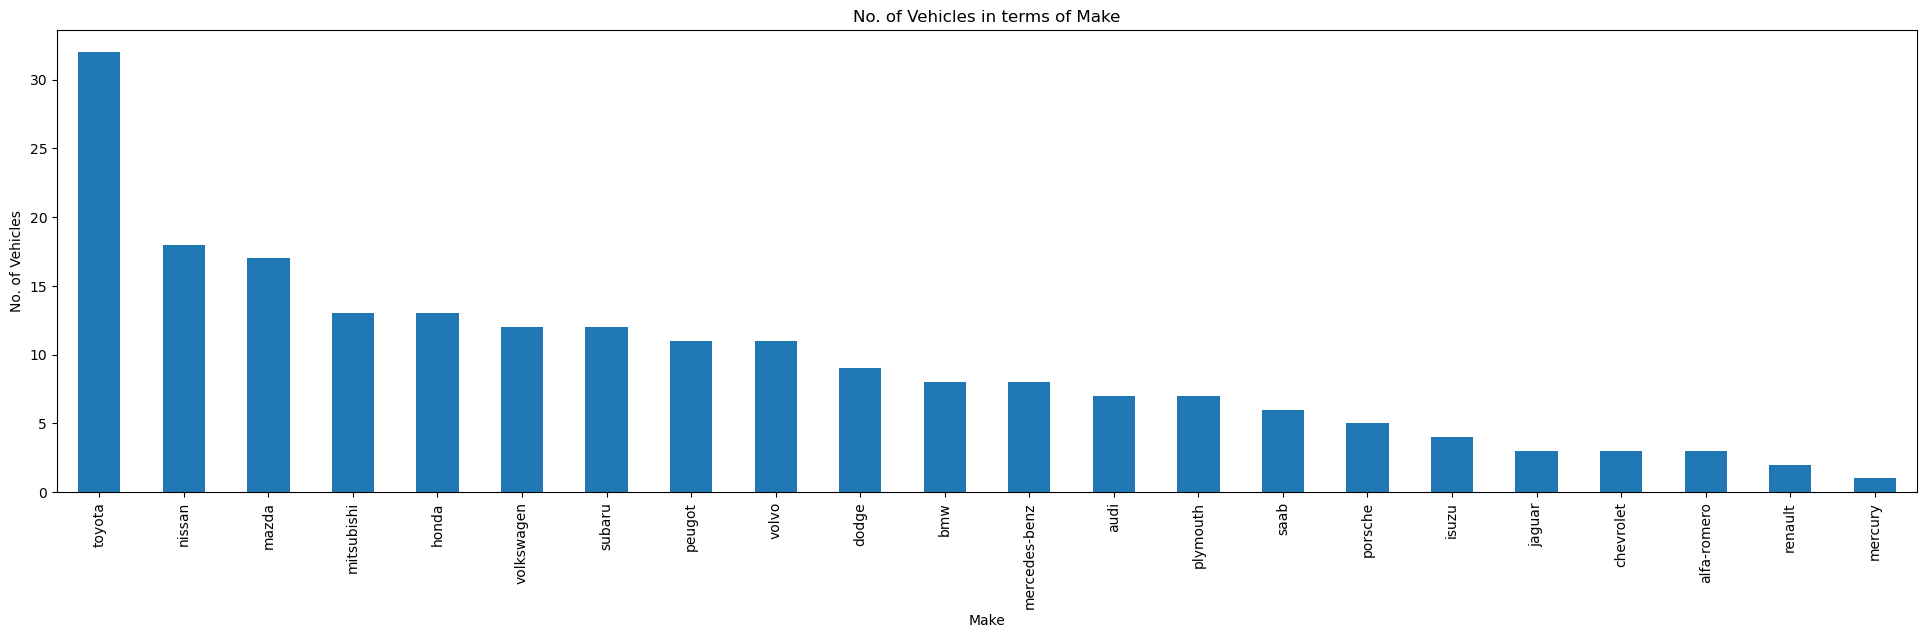

In [4]:
import matplotlib.pyplot as plt   

auto.make.value_counts().nlargest(23).plot(kind='bar',figsize=(24,6)) 
plt.title("No. of Vehicles in terms of Make")
plt.xlabel("Make")
plt.ylabel("No. of Vehicles")

In [5]:
nl=auto['normalized-losses'].loc[auto['normalized-losses'] !='?'].count()
nmean=nl.astype(int).mean()
auto['normalized-losses']=auto['normalized-losses'].replace('?',nmean).astype(int)
auto.head(7)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,164,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710


Text(0.5, 0, 'Normalized losses')

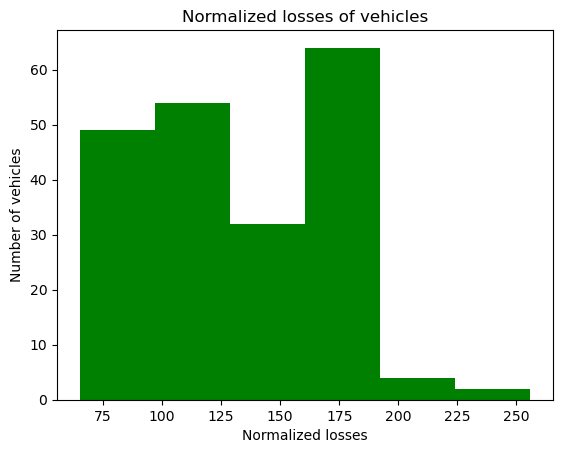

In [6]:
auto['normalized-losses'].hist(bins=6,color='Green',grid=False)
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses')

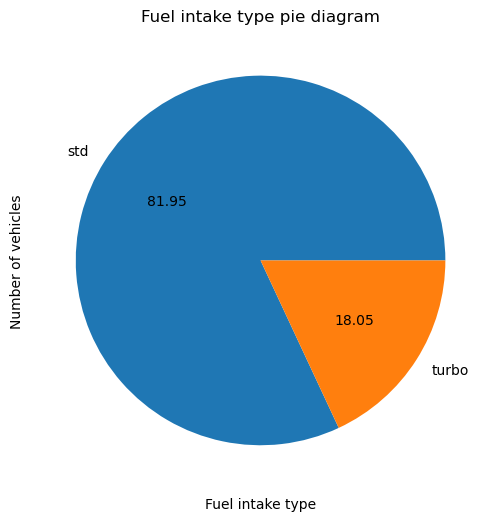

In [7]:
auto['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel intake type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel intake type');

C:\Users\vaiba\AppData\Local\Temp\ipykernel_17508\702143724.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=auto.corr()


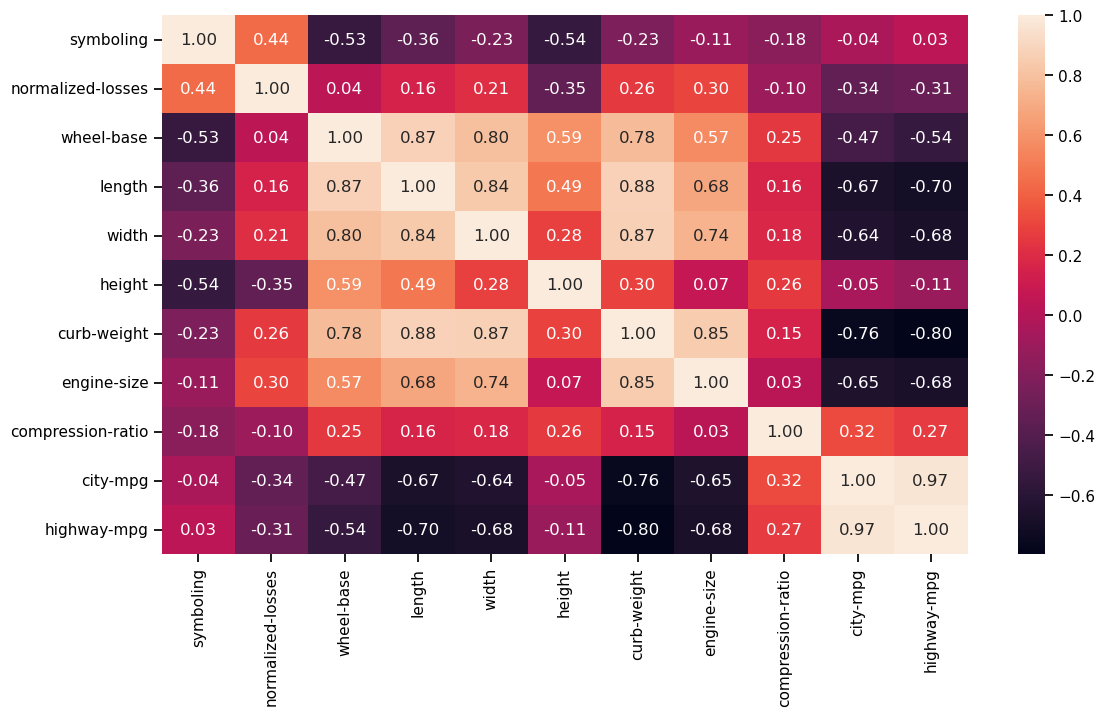

In [8]:
import seaborn as sns
corr=auto.corr()
sns.set_context("notebook",font_scale=1.0,rc={"lines.linewidth":3})
plt.figure(figsize=(13,7))
a=sns.heatmap(corr,annot=True,fmt ='.2f')

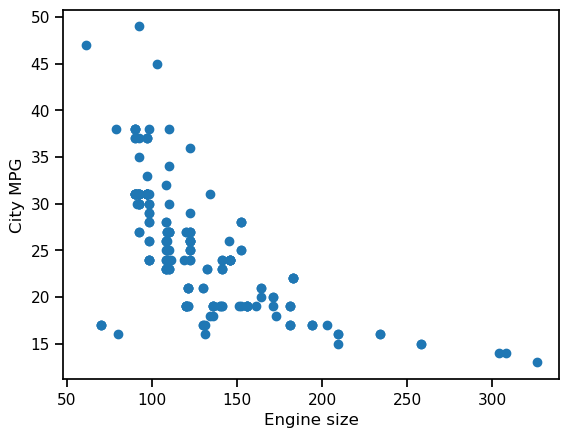

In [9]:
plt.scatter(auto['engine-size'],auto['city-mpg'])
plt.xlabel('Engine size')
plt.ylabel('City MPG');

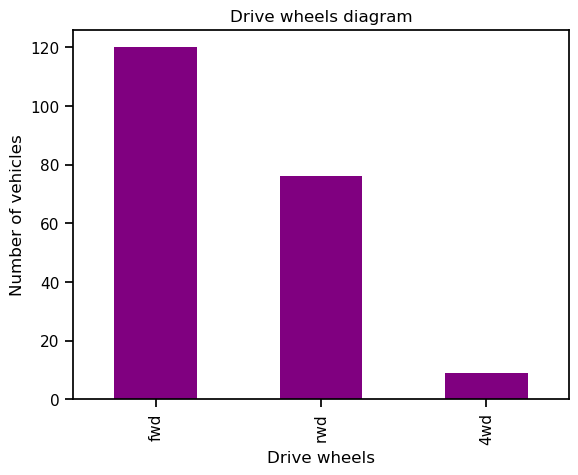

In [10]:
auto['drive-wheels'].value_counts().plot(kind='bar',color='purple')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');

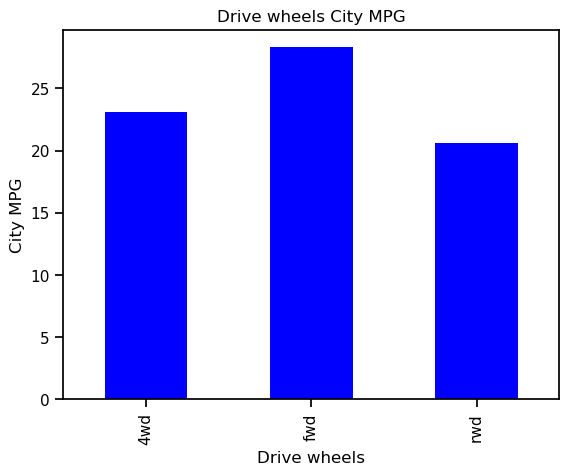

In [11]:
auto.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar',color='blue')
plt.title("Drive wheels City MPG")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels');

In [12]:
nl=auto['price'].loc[auto['price'] !='?'].count()
nmean=nl.astype(int).mean()
auto['price']=auto['price'].replace('?',nmean).astype(int)
auto.head(7)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,164,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710


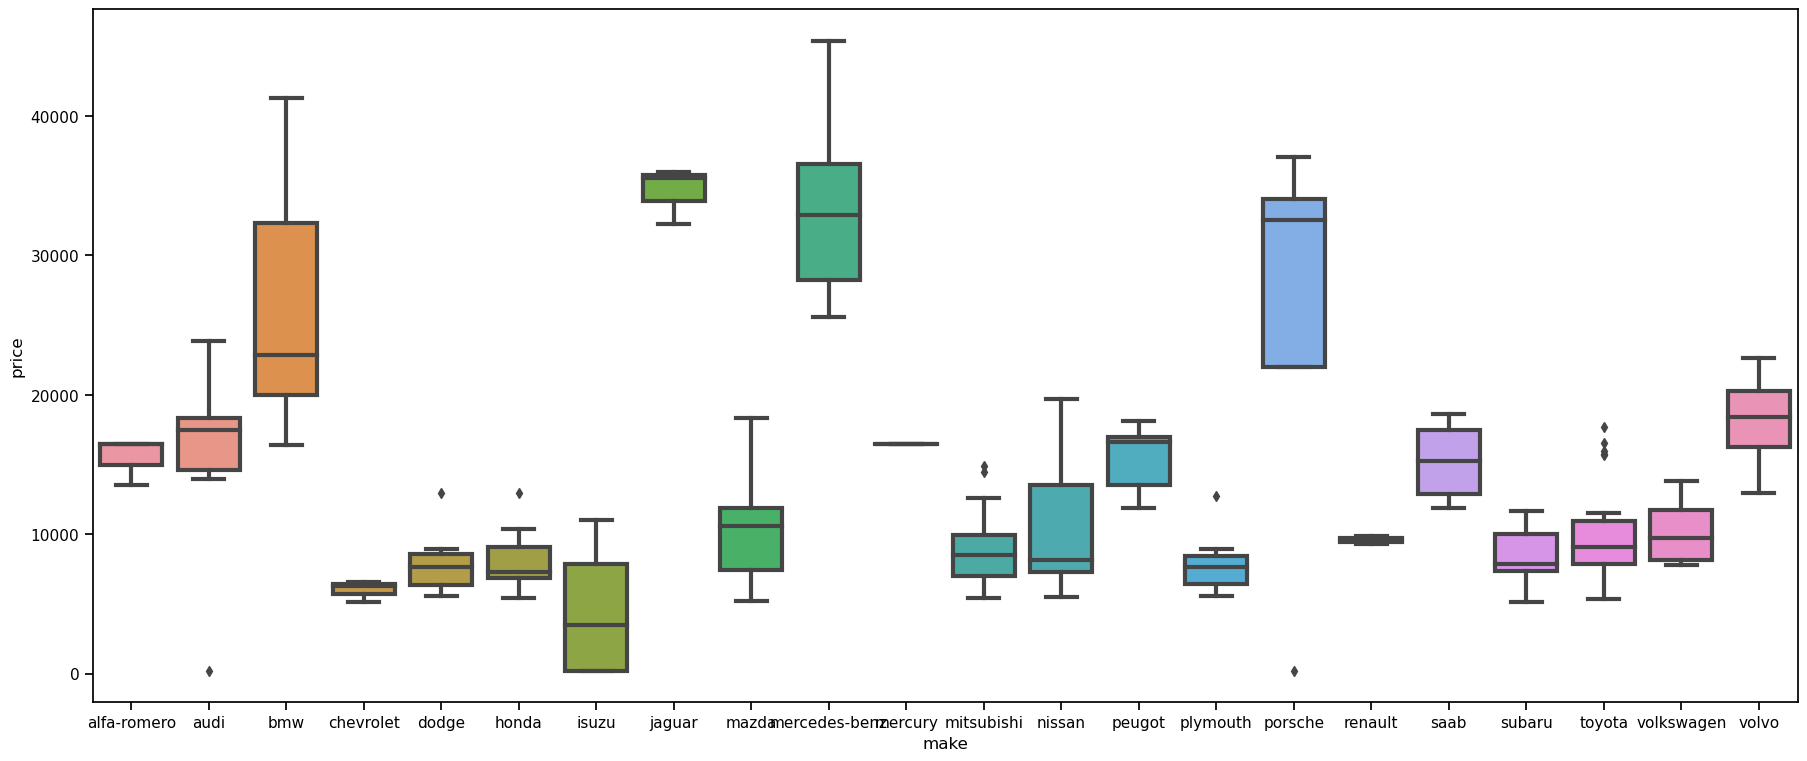

In [13]:
plt.rcParams['figure.figsize']=(22,9)
sns.boxplot(data=auto,x='make',y='price');

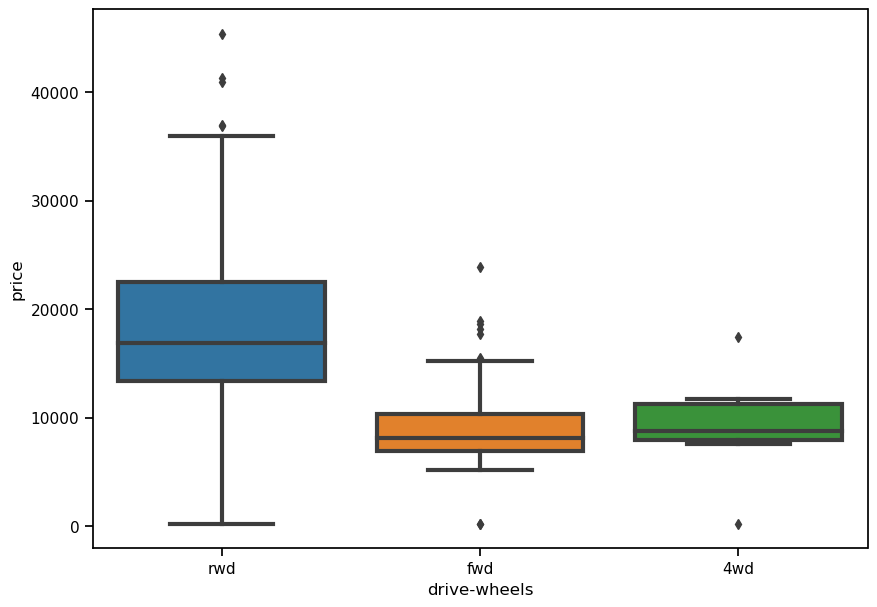

In [14]:
plt.rcParams['figure.figsize']=(10,7)
sns.boxplot(x='drive-wheels',y='price',data=auto);